# Medicaid, drug spending

In [45]:
df = read.csv('medicaid-costs-master.csv')

library(dplyr)
library(ggplot2)
library(repr)

In [47]:
df$drug_spending = df$drug_spending %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$drug_rebates = df$drug_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$spending_less_rebates = df$spending_less_rebates %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_state = df$medicaid_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_federal = df$medicaid_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_total = df$medicaid_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_state = df$all_spending_state %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_federal = df$all_spending_federal %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$all_spending_total = df$all_spending_total %>% sub('\\$','',.) %>% gsub('\\,','',.) %>% as.numeric(.)
df$medicaid_as_share_of_all_spending = df$medicaid_as_share_of_all_spending %>% sub('\\%','',.) %>% as.character(.) %>% as.numeric(.)

In [48]:
head(df)

period_covered,st_abbreviation,st_name,drug_spending,drug_rebates,spending_less_rebates,medicaid_state,medicaid_federal,medicaid_total,all_spending_state,all_spending_federal,all_spending_total,medicaid_as_share_of_all_spending
2008,AK,Alaska,82927006,-21507868,61419138,359000000,612000000,971000000,9342000000,2314000000,11656000000,8.33
2008,AL,Alabama,441171250,-139935487,301235764,1501000000,2899000000,4400000000,13549000000,6291000000,19840000000,22.18
2008,AR,Arkansas,326156278,-105904688,220251590,937000000,2494000000,3431000000,12093000000,4806000000,16899000000,20.30
2008,CA,California,3104054352,-1223480059,1880574293,13434000000,24857000000,38291000000,138065000000,56211000000,194276000000,19.71
2008,CO,Colorado,231323507,-73561741,157761766,1905204000,1720625000,3625829000,20389260000,4738747000,25128007000,14.43
2008,CT,Connecticut,355565440,-93077341,262488099,4265000000,0,4265000000,22153870636,2116958556,24270829192,17.57


Get summaries for plots

In [51]:
amts = df %>%
    group_by(period_covered) %>%
    summarise(medicaid_perc = sum(medicaid_total)/sum(all_spending_total)*100)
amts$medicaid_perc
amts

[1] 20.49083 21.81203 22.22471 23.80227 23.90511 24.32234 26.52106 27.93481
[9] 28.70977

period_covered,medicaid_perc
2008,20.49083
2009,21.81203
2010,22.22471
2011,23.80227
2012,23.90511
2013,24.32234
2014,26.52106
2015,27.93481
2016,28.70977


In [52]:
totals = df %>%
    group_by(period_covered) %>%
    summarise(total = sum(spending_less_rebates)/1000000000)
totals$total
totals

[1] 15.18153 15.16975 19.99600 19.75624 18.12830 17.06612 24.19578 27.82638
[9] 26.38738

period_covered,total
2008,15.18153
2009,15.16975
2010,19.99600
2011,19.75624
2012,18.12830
2013,17.06612
2014,24.19578
2015,27.82638
2016,26.38738


### Drug spending as a percentage of Medicaid by state, over time

In [31]:
str2dol = function(arr) {
    arr = gsub('\\$','',arr) %>% gsub('\\,','',.) %>% as.character() %>% as.numeric()
    return(arr)
}

df$spending_less_rebates = str2dol(df$spending_less_rebates)
df$medicaid_total = str2dol(df$medicaid_total)

In [32]:
head(df)

period_covered,st_abbreviation,st_name,drug_spending,drug_rebates,spending_less_rebates,medicaid_state,medicaid_federal,medicaid_total,all_spending_state,all_spending_federal,all_spending_total,medicaid_as_share_of_all_spending
2008,AK,Alaska,"$82,927,006.16","-$21,507,868.00",61419138,"$359,000,000.00","$612,000,000.00",971000000,"$9,342,000,000.00","$2,314,000,000.00","$11,656,000,000.00",8.33%
2008,AL,Alabama,"$441,171,250.50","-$139,935,487.00",301235764,"$1,501,000,000.00","$2,899,000,000.00",4400000000,"$13,549,000,000.00","$6,291,000,000.00","$19,840,000,000.00",22.18%
2008,AR,Arkansas,"$326,156,278.10","-$105,904,688.00",220251590,"$937,000,000.00","$2,494,000,000.00",3431000000,"$12,093,000,000.00","$4,806,000,000.00","$16,899,000,000.00",20.30%
2008,CA,California,"$3,104,054,352.23","-$1,223,480,059.00",1880574293,"$13,434,000,000.00","$24,857,000,000.00",38291000000,"$138,065,000,000.00","$56,211,000,000.00","$194,276,000,000.00",19.71%
2008,CO,Colorado,"$231,323,506.60","-$73,561,741.00",157761766,"$1,905,204,000.00","$1,720,625,000.00",3625829000,"$20,389,260,000.00","$4,738,747,000.00","$25,128,007,000.00",14.43%
2008,CT,Connecticut,"$355,565,440.20","-$93,077,341.00",262488099,"$4,265,000,000.00",$0.00,4265000000,"$22,153,870,636.00","$2,116,958,556.00","$24,270,829,192.00",17.57%


In [33]:
df$drug_part_medicaid = df$spending_less_rebates/df$medicaid_total*100

In [43]:
library(ggplot2)
options(repr.plot.width=7, repr.plot.height=7)

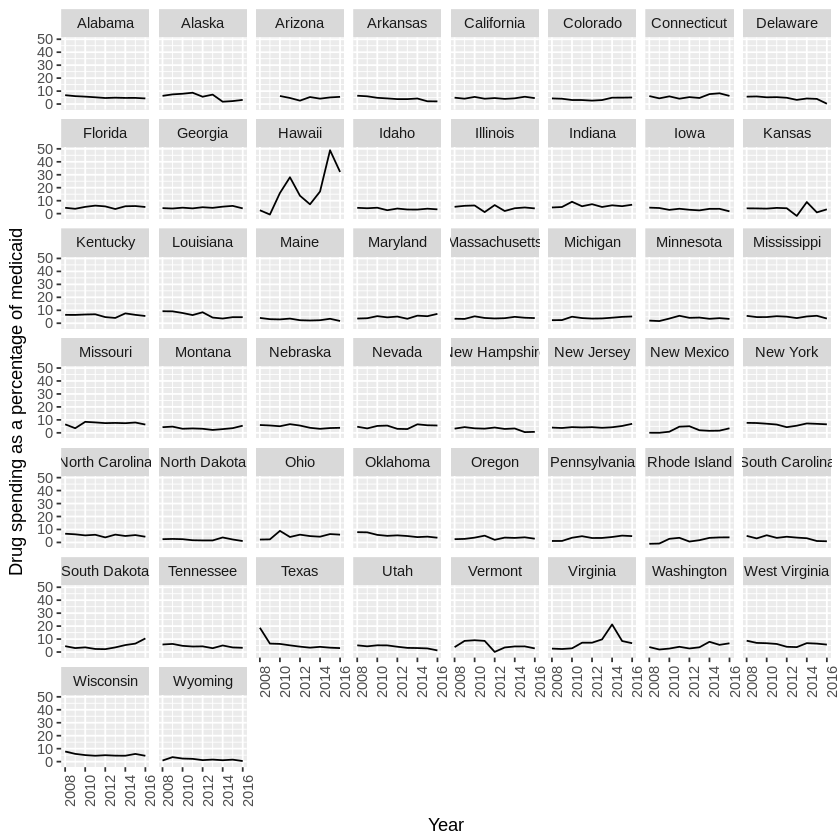

In [44]:
ggplot(df, aes(period_covered, drug_part_medicaid)) +
    geom_line() +
    facet_wrap(~ st_name) +
    ylab('Drug spending as a percentage of medicaid') +
    xlab('Year') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Lobbyists to legislators

In [1]:
df = read.csv('lobbyists-to-legislators.csv')
totals = read.csv('total-lobbyists.csv')

library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
head(df)

jurisdiction,year,annual_registrations,state_name,seats,registrations_to_legislators
AL,2016,33,ALABAMA,140,0.24
AL,2015,49,ALABAMA,140,0.35
AL,2014,51,ALABAMA,140,0.36
AL,2013,38,ALABAMA,140,0.27
AL,2012,41,ALABAMA,140,0.29
AL,2011,39,ALABAMA,140,0.28


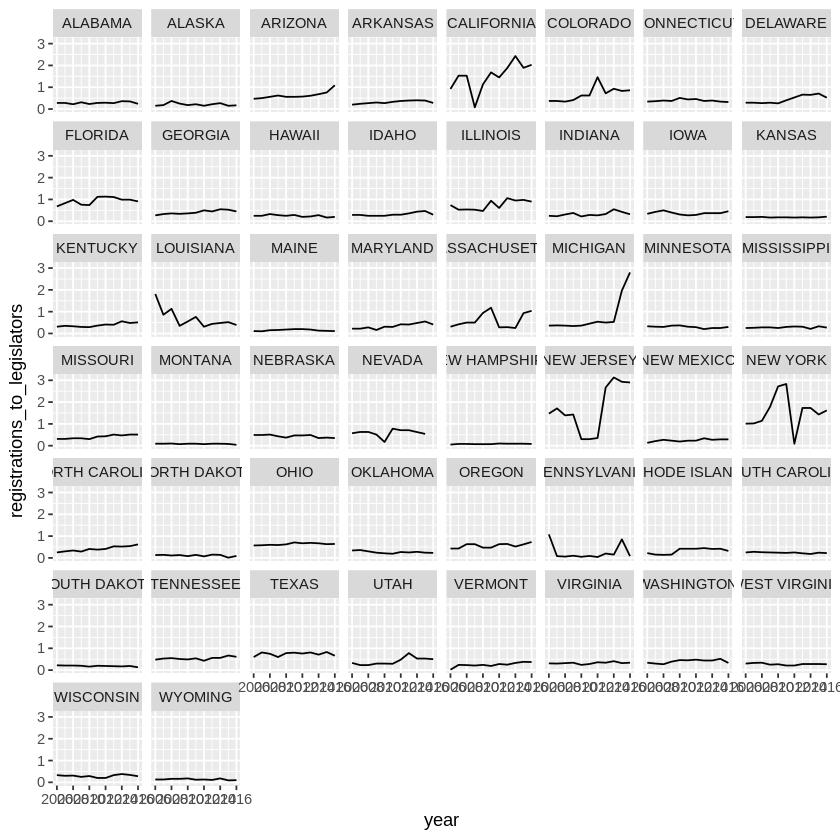

In [121]:
ggplot(df, aes(year, registrations_to_legislators)) + geom_line() + facet_wrap(~ state_name)

In [2]:
ratios = df %>%
    filter(year == 2016) %>%
    group_by(state_name, jurisdiction) %>%
    summarise(ratio = annual_registrations/seats)

In [3]:
ratios$state_name
ratios$ratio

[1] ALABAMA        ALASKA         ARIZONA        ARKANSAS       CALIFORNIA    
 [6] COLORADO       CONNECTICUT    DELAWARE       FLORIDA        GEORGIA       
[11] HAWAII         IDAHO          ILLINOIS       INDIANA        IOWA          
[16] KANSAS         KENTUCKY       LOUISIANA      MAINE          MARYLAND      
[21] MASSACHUSETTS  MICHIGAN       MINNESOTA      MISSISSIPPI    MISSOURI      
[26] MONTANA        NEBRASKA       NEW HAMPSHIRE  NEW JERSEY     NEW MEXICO    
[31] NEW YORK       NORTH CAROLINA NORTH DAKOTA   OHIO           OKLAHOMA      
[36] OREGON         PENNSYLVANIA   RHODE ISLAND   SOUTH CAROLINA SOUTH DAKOTA  
[41] TENNESSEE      TEXAS          UTAH           VERMONT        VIRGINIA      
[46] WASHINGTON     WEST VIRGINIA  WISCONSIN      WYOMING       
50 Levels: ALABAMA ALASKA ARIZONA ARKANSAS CALIFORNIA COLORADO ... WYOMING

[1] 0.23571429 0.16666667 1.08888889 0.28148148 2.03333333 0.86000000
 [7] 0.31550802 0.51612903 0.91250000 0.45338983 0.19736842 0.30476190
[13] 0.90395480 0.32000000 0.46000000 0.21212121 0.50724638 0.38888889
[19] 0.10752688 0.40957447 1.04000000 2.79729730 0.30348259 0.27011494
[25] 0.50761421 0.04000000 0.34693878 0.08254717 2.90000000 0.28571429
[31] 1.61502347 0.62352941 0.08510638 0.63636364 0.23489933 0.73333333
[37] 0.07905138 0.31858407 0.22352941 0.13333333 0.61363636 0.66298343
[43] 0.50000000 0.37222222 0.34285714 0.32653061 0.26865672 0.28030303
[49] 0.10000000

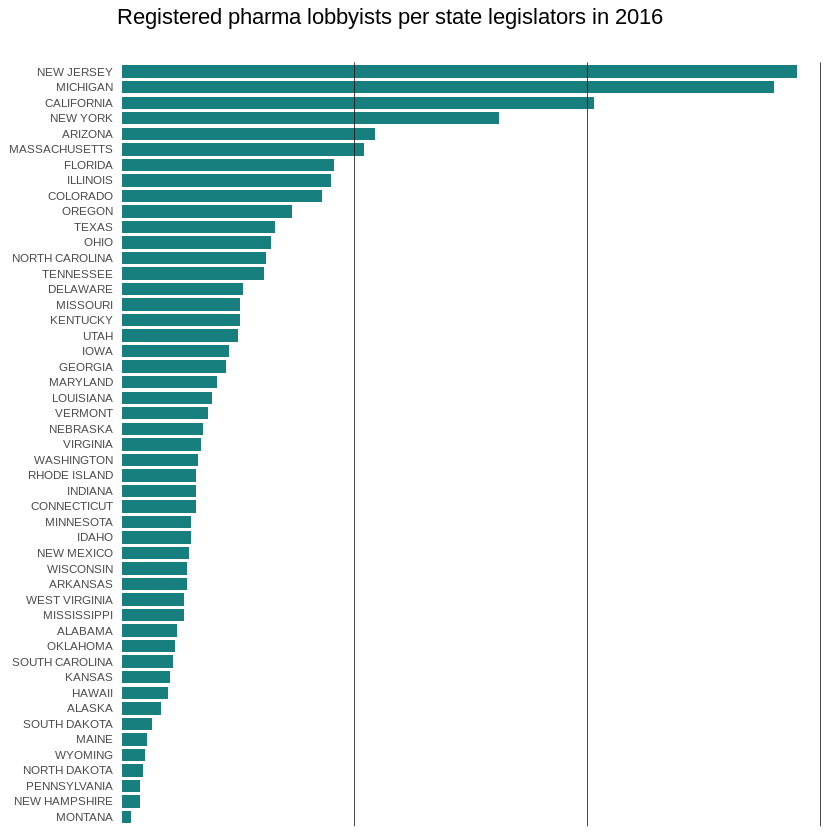

In [6]:
ggplot(ratios, aes(reorder(state_name,ratio), ratio)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per state legislators in 2016') +
 #   geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    geom_abline(intercept = 200, slope = 0, size = .2) +
    geom_abline(intercept = 300, slope = 0, size = .2) +

    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))

In [184]:
ratios = ratios %>% left_join(., totals, by = 'jurisdiction')

In [185]:
ratios$diff = ratios$count - ratios$ratio

In [187]:
ratios = ratios %>% select(c(1,3,5))

In [188]:
head(ratios)

state_name,ratio,diff
ALABAMA,24,1906
ALASKA,17,603
ARIZONA,109,14509
ARKANSAS,28,3407
CALIFORNIA,203,20343
COLORADO,86,3750


In [193]:
temp = gather(ratios, type, ratio, 2:3)

In [195]:
head(temp)

state_name,type,ratio
ALABAMA,ratio,24
ALASKA,ratio,17
ARIZONA,ratio,109
ARKANSAS,ratio,28
CALIFORNIA,ratio,203
COLORADO,ratio,86


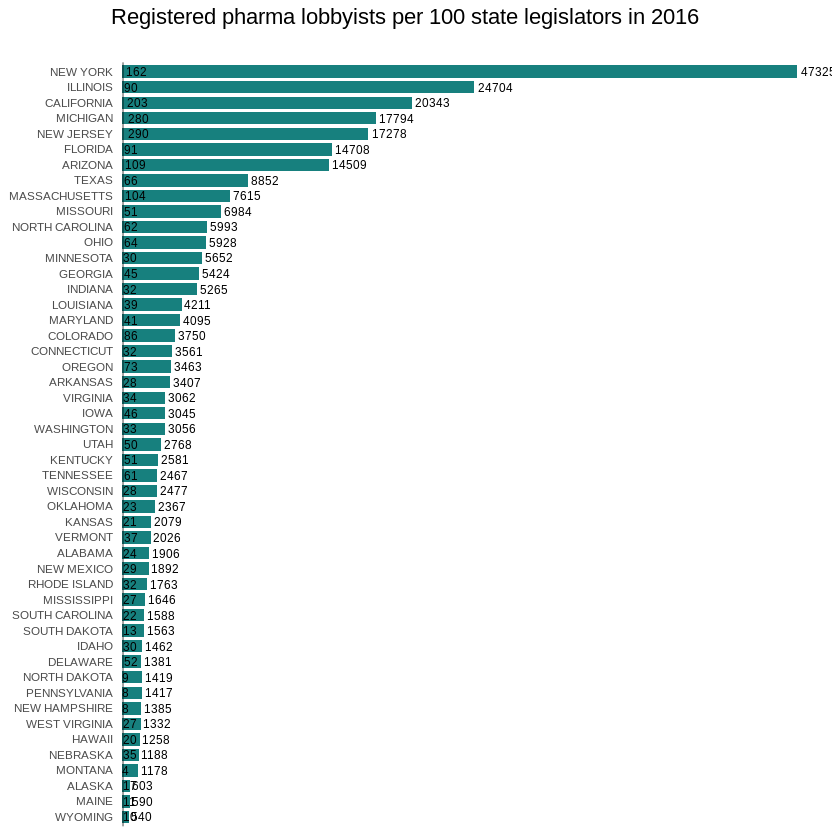

In [196]:
ggplot(temp, aes(reorder(state_name,ratio), ratio, fill = type)) +
    geom_col(width = 0.8, fill = '#17807E', position = position_dodge(width = 20)) +
    coord_flip() +
    ggtitle('Registered pharma lobbyists per 100 state legislators in 2016') +
    geom_text(aes(label = ratio, hjust = -.1), size = 2.5) +
    geom_abline(intercept = 100, slope = 0, size = .2) +
    theme(panel.grid.major = element_blank(),
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         legend.position = 'none',
         axis.title.y = element_blank(),
         axis.ticks.y = element_blank(),
         axis.text.y = element_text(size = 7, margin = margin(r = -18)),
         axis.ticks.x = element_blank(),
         axis.text.x = element_blank(),
         axis.title.x = element_blank(),
         plot.title = element_text(hjust = .15, margin = margin(b = 20)))

In [12]:
ratios = df %>%
    filter(year == 2016) %>%
    group_by(state_name) %>%
    select(c(state_name, annual_registrations, seats))

In [14]:
ratios$ratio = ratios$annual_registrations/ratios$seats
ratios = ratios %>% arrange(-ratio)

In [19]:
ratios$seats

[1] 120 148 120 213  90 200 160 177 100  90 181 132 170 132  62 197 138 104 150
[20] 236 188 144 180  49 140 147 150 113 187 105 201 112 135 132 174 134 140 149
[39] 170 165  76  60 105 186  90 141 424 253 150